In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes  
from kmodes.kmodes import KModes


In [141]:
df = pd.read_csv("BankChurners.csv")
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [142]:
df.isnull().sum()


CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [143]:
df=df[['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category','Months_on_book']]
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21
...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36


In [144]:
df_temp= df[['Customer_Age','Dependent_count','Months_on_book']]
df_temp


,Customer_Age,Dependent_count,Months_on_book
0,45,3,39
1,49,5,44
2,51,3,36
3,40,4,34
4,40,3,21
...,...,...,...
10122,50,2,40
10123,41,2,25
10124,44,1,36
10125,30,2,36


In [145]:
df.dtypes

Attrition_Flag     object
Customer_Age        int64
Gender             object
Dependent_count     int64
Education_Level    object
Marital_Status     object
Income_Category    object
Card_Category      object
Months_on_book      int64
dtype: object

In [146]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book
0,1,19,1,3,3,1,2,0,26
1,1,23,0,5,2,2,4,0,31
2,1,25,1,3,2,1,3,0,23
3,1,14,0,4,3,3,4,0,21
4,1,14,1,3,5,1,2,0,8


In [147]:
scaler = MinMaxScaler()
scaler.fit(df[['Customer_Age']])
df['Customer_Age'] = scaler.transform(df[['Customer_Age']])

scaler = MinMaxScaler()
scaler.fit(df[['Dependent_count']])
df['Dependent_count'] = scaler.transform(df[['Dependent_count']])

scaler = MinMaxScaler()
scaler.fit(df[['Months_on_book']])
df['Months_on_book'] = scaler.transform(df[['Months_on_book']])


In [148]:
df.dtypes

Attrition_Flag       int32
Customer_Age       float64
Gender               int32
Dependent_count    float64
Education_Level      int32
Marital_Status       int32
Income_Category      int32
Card_Category        int32
Months_on_book     float64
dtype: object

In [149]:
mark_array= df.values
print(mark_array)
mark_array[:, 1] = mark_array[:, 2].astype(float)
mark_array[:, 3] = mark_array[:, 4].astype(float)
mark_array[:, 8] = mark_array[:, 4].astype(float)

[[1.         0.43181818 1.         ... 2.         0.         0.60465116]
 [1.         0.52272727 0.         ... 4.         0.         0.72093023]
 [1.         0.56818182 1.         ... 3.         0.         0.53488372]
 ...
 [0.         0.40909091 0.         ... 4.         0.         0.53488372]
 [0.         0.09090909 1.         ... 1.         0.         0.53488372]
 [0.         0.38636364 0.         ... 4.         3.         0.27906977]]


In [166]:
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init = "Cao",n_init = 1,verbose=2, max_iter=20)
    kproto.fit_predict(mark_array, categorical=[0,2,4,5,6,7])
    cost.append(kproto.cost_)


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 0, ncost: 88830.12817413629
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 0, ncost: 42457.75883780277
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 516, ncost: 26853.943331963033
Run: 1, iteration: 2/20, moves: 0, ncost: 26853.943331963033
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initia

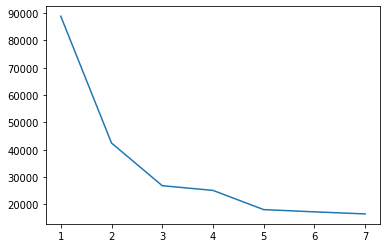

In [167]:
elbow = np.array([i for i in range(1,8,1)])
plt.plot(elbow,cost)

In [168]:
kproto = KPrototypes(n_clusters=5, init = "Cao",n_init = 1,verbose=2, max_iter=20)
clusters=kproto.fit_predict(mark_array, categorical=[0,2,4,5,6,7])


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2209, ncost: 24367.388767007873
Run: 1, iteration: 2/20, moves: 128, ncost: 24310.210528212734
Run: 1, iteration: 3/20, moves: 4, ncost: 24310.170121492978
Run: 1, iteration: 4/20, moves: 0, ncost: 24310.170121492978


In [169]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)



df['cluster']=cluster_dict



# Put original columns from temp to df:
df[['Customer_Age','Dependent_count','Months_on_book']] = df_temp




In [170]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,cluster
0,1,45,1,3,3,1,2,0,39,2
1,1,49,0,5,2,2,4,0,44,1
2,1,51,1,3,2,1,3,0,36,1
3,1,40,0,4,3,3,4,0,34,4
4,1,40,1,3,5,1,2,0,21,0
...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,2,1,0,40,1
10123,0,41,1,2,6,0,1,0,25,0
10124,0,44,0,1,3,1,4,0,36,4
10125,0,30,1,2,2,3,1,0,36,1


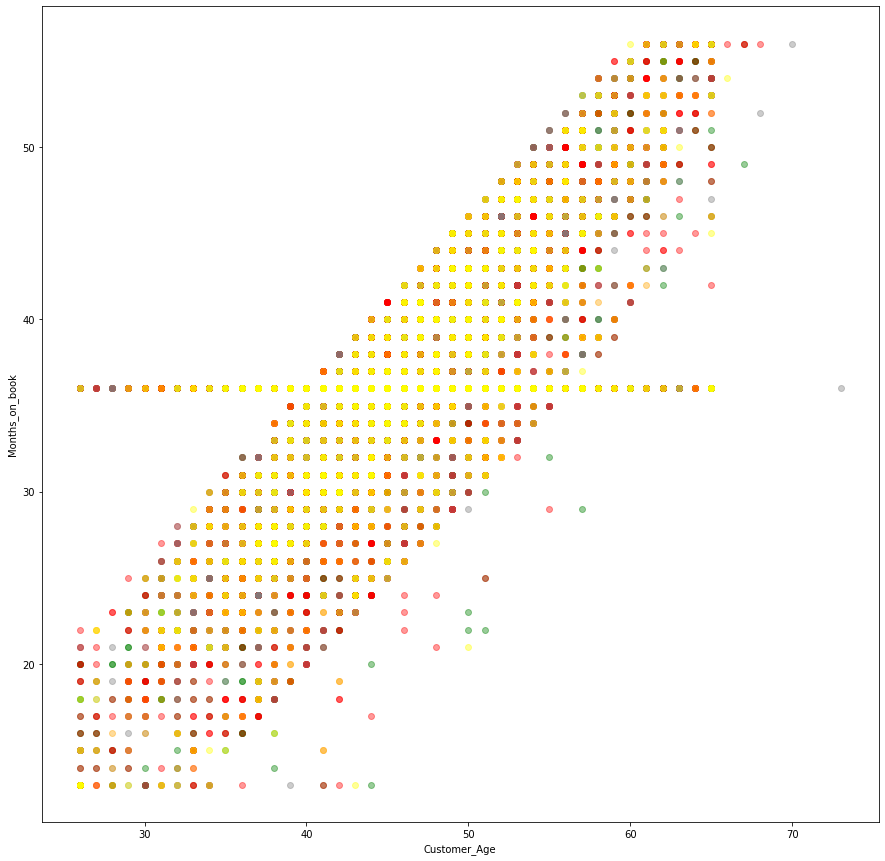

In [171]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]




plt.figure(figsize=(15,15))
plt.xlabel('Customer_Age')
plt.ylabel('Months_on_book')

plt.scatter(df1.Customer_Age, df1['Months_on_book'],color='green', alpha = 0.4)
plt.scatter(df2.Customer_Age, df2['Months_on_book'],color='red', alpha = 0.4)
plt.scatter(df3.Customer_Age, df3['Months_on_book'],color='gray', alpha = 0.4)
plt.scatter(df4.Customer_Age, df4['Months_on_book'],color='orange', alpha = 0.4)
plt.scatter(df5.Customer_Age, df5['Months_on_book'],color='yellow', alpha = 0.4)

